# <b><span style='color:#F1A424'>AutoFraud - Online Payment Fraud Detection</span> </b>

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview:</b>

**Dataset used - Online Payment Fraud Dataset**

**Features**:

- `step`: Represents a unit of time where 1 step equals 1 hour.
- `type`: Type of Transaction.
- `amount`: Transaction Amount.
- `nameOrig`: Customer starting the Transaction.
- `oldbalanceOrg`: Balance before the Transaction.
- `newbalanceOrg`: Balance after the Transaction.
- `nameDest`: Recipient of Transaction
- `oldbalanceDest`: Balance of Recipient before Transaction
- `newbalanceDest`: Balance of Recipient after Transaction


**Target Variable**:

- `isFraud`: Binary variable indicating whether the transaction is Fraud (1) or not (0).

        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict whether a Transaction is fraud based on the available features.
                                 
**Usecase**:

- Here, we will use AutoFraud(Automated Fraud Detection) functionality to automate the entire process of developing a predictive model. 
- It will perform `feature exploration`, `feature engineering`, `data preparation`, `model training` and `model evaluation` on dataset in auto run and at end we will get `leaderboard` containined different models along with their performance. 
- Model will also have `rank` associated with them which indicates which is `best performing model` for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoFraud

In [3]:
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit
from teradataml import copy_to_sql

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

## <b><span style='color:#F1A424'>| 1.</span> Loading Deployed Models - 'top_10_models' </b>

### <b><span style='color:#F1A424'>| 1.1.</span> Loading Model </b>

In [6]:
fd = AutoFraud()

In [7]:
models_1 = fd.load('top_10_models')

In [8]:
models_1

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1,DATA_TABLE
0,1,XGBOOST_2,pca,0.985000,0.985000,0.985000,0.985000,0.886237,0.670918,0.735326,0.982738,0.985000,0.982108,ml__isFraud_pca_1740722900198531
1,2,DECISIONFOREST_2,pca,0.982500,0.982500,0.982500,0.982500,0.814178,0.639031,0.691213,0.978645,0.982500,0.979126,ml__isFraud_pca_1740722900198531
2,3,SVM_2,pca,0.980000,0.980000,0.980000,0.980000,0.490000,0.500000,0.494949,0.960400,0.980000,0.970101,ml__isFraud_pca_1740722900198531
3,4,GLM_2,pca,0.980000,0.980000,0.980000,0.980000,0.490000,0.500000,0.494949,0.960400,0.980000,0.970101,ml__isFraud_pca_1740722900198531
4,5,KNN_0,lasso,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219,ml__isFraud_lasso_1740722929968044
5,6,KNN_4,rfe,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219,ml__isFraud_rfe_1740722838106102
6,7,KNN_9,lasso,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943,ml__isFraud_lasso_1740722929968044
7,8,KNN_13,rfe,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943,ml__isFraud_rfe_1740722838106102
8,9,DECISIONFOREST_1,rfe,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065,ml__isFraud_rfe_1740722838106102
9,10,DECISIONFOREST_0,lasso,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065,ml__isFraud_lasso_1740722929968044


In [9]:
### Loading Dataset for Prediction

df= DataFrame.from_table("payment_fraud_dataset")

In [10]:
df

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
26,TRANSFER,None,C1879175902,369186.87,0.0,C900709443,0.0,0.0,1
34,TRANSFER,1462355.44,C2112073607,1462355.44,0.0,C399994587,0.0,0.0,1
66,CASH_OUT,7169129.94,C877157675,7169129.94,0.0,C357180483,0.0,7169129.94,1
12,CASH_OUT,19472.0,C1205151454,19472.0,0.0,C664770316,0.0,19472.0,1
39,TRANSFER,238717.5,C492613437,238717.5,0.0,C74971191,0.0,0.0,1
37,CASH_OUT,93083.27,C517122648,93083.27,None,C839403720,2466124.85,2559208.13,1
6,TRANSFER,17246.0,C1034673425,17246.0,0.0,C1379589736,0.0,101717.84,1
46,CASH_OUT,35016.23,C1267520613,None,0.0,C801157832,65435.34,100451.57,1
90,TRANSFER,266746.42,C1640647431,266746.42,0.0,C1995045376,0.0,0.0,1
14,CASH_OUT,143032.0,C465166521,143032.0,0.0,C487776685,814654.61,1020323.73,1


In [11]:
df.shape

(10000, 10)

### <b><span style='color:#F1A424'>| 1.2.</span> Generating Prediction & Performance Metrics</b>

Generating prediction using:
Model Name: XGBOOST
Feature Selection: pca
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Applying SHAP for Model Interpretation (Load)...

SHAP Analysis Completed. Feature Importance Available.


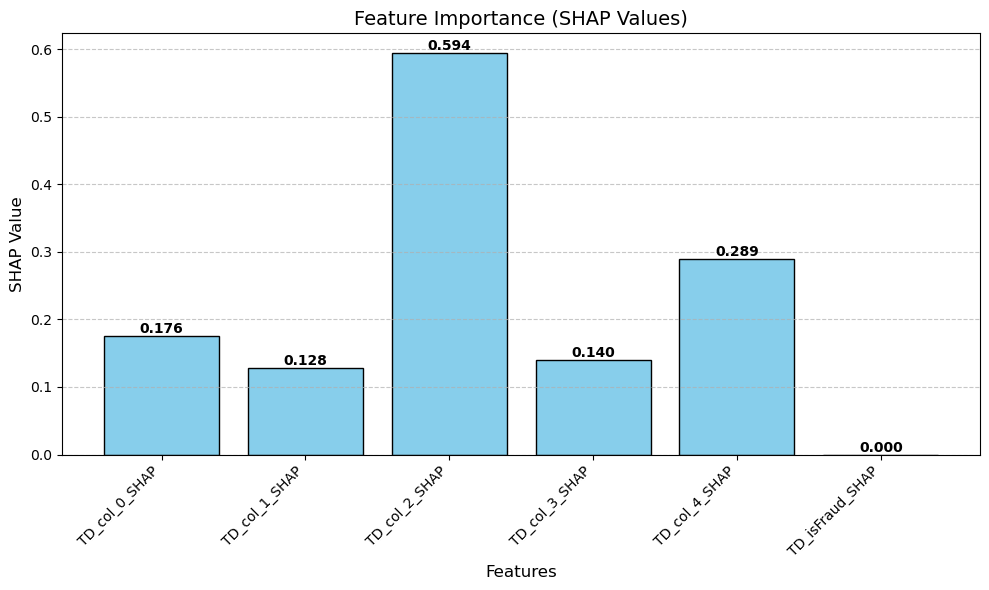

In [12]:
# Generate prediction using some data rows and model rank

prediction = fd.predict(df.iloc[:80], rank=1)

In [13]:
prediction

id,Prediction,Prob_1,Prob_0,isFraud
80,0,0.1982336408618083,0.8017663591381917,1
244,0,0.011046652789808572,0.9889533472101913,1
184,0,0.12620506443840315,0.8737949355615968,0
196,0,0.05455761280012864,0.9454423871998713,1
252,1,0.654934533199952,0.34506546680004807,1
220,0,0.035687256188262,0.964312743811738,0
200,0,0.013567261701757061,0.9864327382982429,0
176,0,0.06183400149855161,0.9381659985014483,0
128,0,0.35286577647425327,0.6471342235257468,0
284,0,0.1982336408618083,0.8017663591381917,1


In [14]:
performance_metric = fd.evaluate(df.iloc[:80], rank=1)

Generating performance metrics using:
Model Name: XGBOOST
Feature Selection: pca


In [15]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.887500
1       5     Macro-Precision     0.941558
2       6        Macro-Recall     0.625000
3       7            Macro-F1     0.668966
4       9     Weighted-Recall     0.887500
5      10         Weighted-F1     0.857241
6       8  Weighted-Precision     0.900649
7       4            Micro-F1     0.887500
8       2     Micro-Precision     0.887500
9       1            Accuracy     0.887500


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision  Recall        F1  Support
SeqNum                                                                            
0               0  CLASS_1       68        9   0.883117    1.00  0.937931       68
1               1  CLASS_2        0        3   1.000000    0.25  0.400000       12


Generating prediction using:
Model Name: DECISIONFOREST
Feature Selection: rfe
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Applying SHAP for Model Interpretation (Load)...

SHAP Analysis Completed. Feature Importance Available.


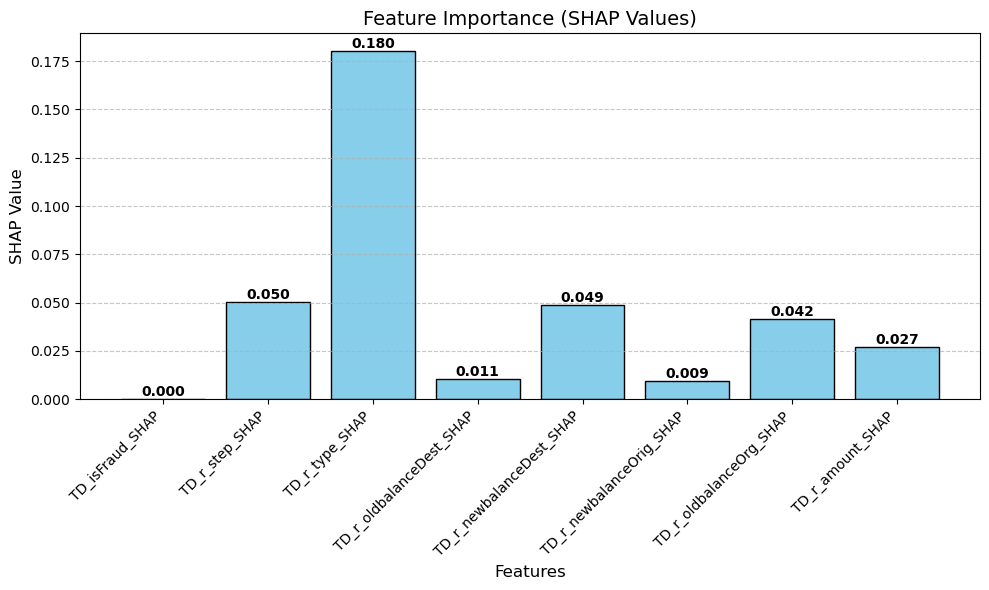

In [16]:
# Generate prediction using some data rows and model rank

prediction = fd.predict(df.iloc[:80], rank=9)

In [17]:
prediction

id,prediction,prob_1,prob_0,isFraud
84,0,0.0,1.0,1
288,1,1.0,0.0,1
296,1,1.0,0.0,1
252,1,1.0,0.0,1
208,0,0.0,1.0,1
264,0,0.0,1.0,1
312,0,0.0,1.0,0
12,0,0.0,1.0,0
68,0,0.0,1.0,0
188,1,1.0,0.0,0


In [18]:
performance_metric = fd.evaluate(df.iloc[:80], rank=9)

Generating performance metrics using:
Model Name: DECISIONFOREST
Feature Selection: rfe


In [19]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.887500
1       5     Macro-Precision     0.809198
2       6        Macro-Recall     0.693627
3       7            Macro-F1     0.731243
4       9     Weighted-Recall     0.887500
5      10         Weighted-F1     0.874692
6       8  Weighted-Precision     0.875636
7       4            Micro-F1     0.887500
8       2     Micro-Precision     0.887500
9       1            Accuracy     0.887500


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       66        7   0.904110  0.970588  0.936170       68
1               1  CLASS_2        2        5   0.714286  0.416667  0.526316       12


## <b><span style='color:#F1A424'>| 2.</span> Loading Deployed Models - 'mixed_models' </b>

### <b><span style='color:#F1A424'>| 2.1.</span> Loading Model </b>

In [20]:
# Loading models

models_2 = fd.load('mixed_models')

In [21]:
models_2

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1,DATA_TABLE
0,1,DECISIONFOREST_2,pca,0.982500,0.982500,0.982500,0.982500,0.814178,0.639031,0.691213,0.978645,0.982500,0.979126,ml__isFraud_pca_1740721802242947
1,2,KNN_0,lasso,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219,ml__isFraud_lasso_1740725192548618
2,3,KNN_4,rfe,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219,ml__isFraud_rfe_1740721956901992
3,4,DECISIONFOREST_1,rfe,0.930210,0.930210,0.930210,0.930210,0.933814,0.930210,0.930065,0.933814,0.930210,0.930065,ml__isFraud_rfe_1740721956901992


### <b><span style='color:#F1A424'>| 2.2.</span> Generating Prediction & Performance Metrics</b>

In [22]:
# Generate prediction using data and model rank

prediction = fd.predict(df.iloc[:80], rank=2)

Generating prediction using:
Model Name: KNN
Feature Selection: lasso
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Shap is not applicable for KNN


In [23]:
prediction

id,prediction,prob_1,prob_0,isFraud
32,0,0.0,1.0,0
20,0,0.0,1.0,0
24,0,0.0,1.0,0
36,0,0.0,1.0,0
100,0,0.0,1.0,0
4,0,0.0,1.0,0
12,0,0.0,1.0,0
40,0,0.0,1.0,0
84,1,1.0,0.0,1
8,0,0.0,1.0,0


In [24]:
# Generate performance metrics

performance_metric = fd.evaluate(df.iloc[:80], rank=2)

Generating performance metrics using:
Model Name: KNN
Feature Selection: lasso


In [25]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.987500
1       5     Macro-Precision     0.961538
2       6        Macro-Recall     0.992647
3       7            Macro-F1     0.976296
4       9     Weighted-Recall     0.987500
5      10         Weighted-F1     0.987704
6       8  Weighted-Precision     0.988462
7       4            Micro-F1     0.987500
8       2     Micro-Precision     0.987500
9       1            Accuracy     0.987500


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
1               1  CLASS_2        1       12   0.923077  1.000000  0.960000       12
0               0  CLASS_1       67        0   1.000000  0.985294  0.992593       68


## <b><span style='color:#F1A424'>| 3.</span> Loading Deployed Models - 'range_models' </b>

### <b><span style='color:#F1A424'>| 3.1.</span> Loading Model</b>

In [26]:
# Creating another AutoML object

obj=AutoFraud()

In [27]:
# Loading models

models_3 = obj.load('range_models')

In [28]:
models_3

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1,DATA_TABLE
0,1,KNN_0,lasso,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219,ml__isFraud_lasso_1740722793215479
1,2,KNN_4,rfe,0.966221,0.966221,0.966221,0.966221,0.966330,0.966221,0.966219,0.966330,0.966221,0.966219,ml__isFraud_rfe_1740722601548295
2,3,KNN_9,lasso,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943,ml__isFraud_lasso_1740722793215479
3,4,KNN_13,rfe,0.964946,0.964946,0.964946,0.964946,0.965074,0.964946,0.964943,0.965074,0.964946,0.964943,ml__isFraud_rfe_1740722601548295


### <b><span style='color:#F1A424'>| 3.2.</span> Generating Prediction & Performance Metrics</b>

In [29]:
# Generate prediction using data and model rank

prediction = obj.predict(df.iloc[:80], rank=1)

Generating prediction using:
Model Name: KNN
Feature Selection: lasso
Completed: ｜⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           
Shap is not applicable for KNN


In [30]:
prediction

id,prediction,prob_1,prob_0,isFraud
100,0,0.0,1.0,0
28,0,0.0,1.0,0
32,0,0.0,1.0,0
4,0,0.0,1.0,0
40,0,0.0,1.0,0
8,0,0.0,1.0,0
20,0,0.0,1.0,0
24,0,0.0,1.0,0
12,0,0.0,1.0,0
16,0,4.60054190895378e-06,0.999995399458091,0


In [31]:
# Generate performance metrics

performance_metric = obj.evaluate(df.iloc[:80], rank=1)

Generating performance metrics using:
Model Name: KNN
Feature Selection: lasso


In [32]:
performance_metric


############ output_data Output ############

   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.987500
1       5     Macro-Precision     0.961538
2       6        Macro-Recall     0.992647
3       7            Macro-F1     0.976296
4       9     Weighted-Recall     0.987500
5      10         Weighted-F1     0.987704
6       8  Weighted-Precision     0.988462
7       4            Micro-F1     0.987500
8       2     Micro-Precision     0.987500
9       1            Accuracy     0.987500


############ result Output ############

       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       67        0   1.000000  0.985294  0.992593       68
1               1  CLASS_2        1       12   0.923077  1.000000  0.960000       12


In [32]:
remove_context()

True